In [48]:
###import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.artist import setp
%matplotlib inline  

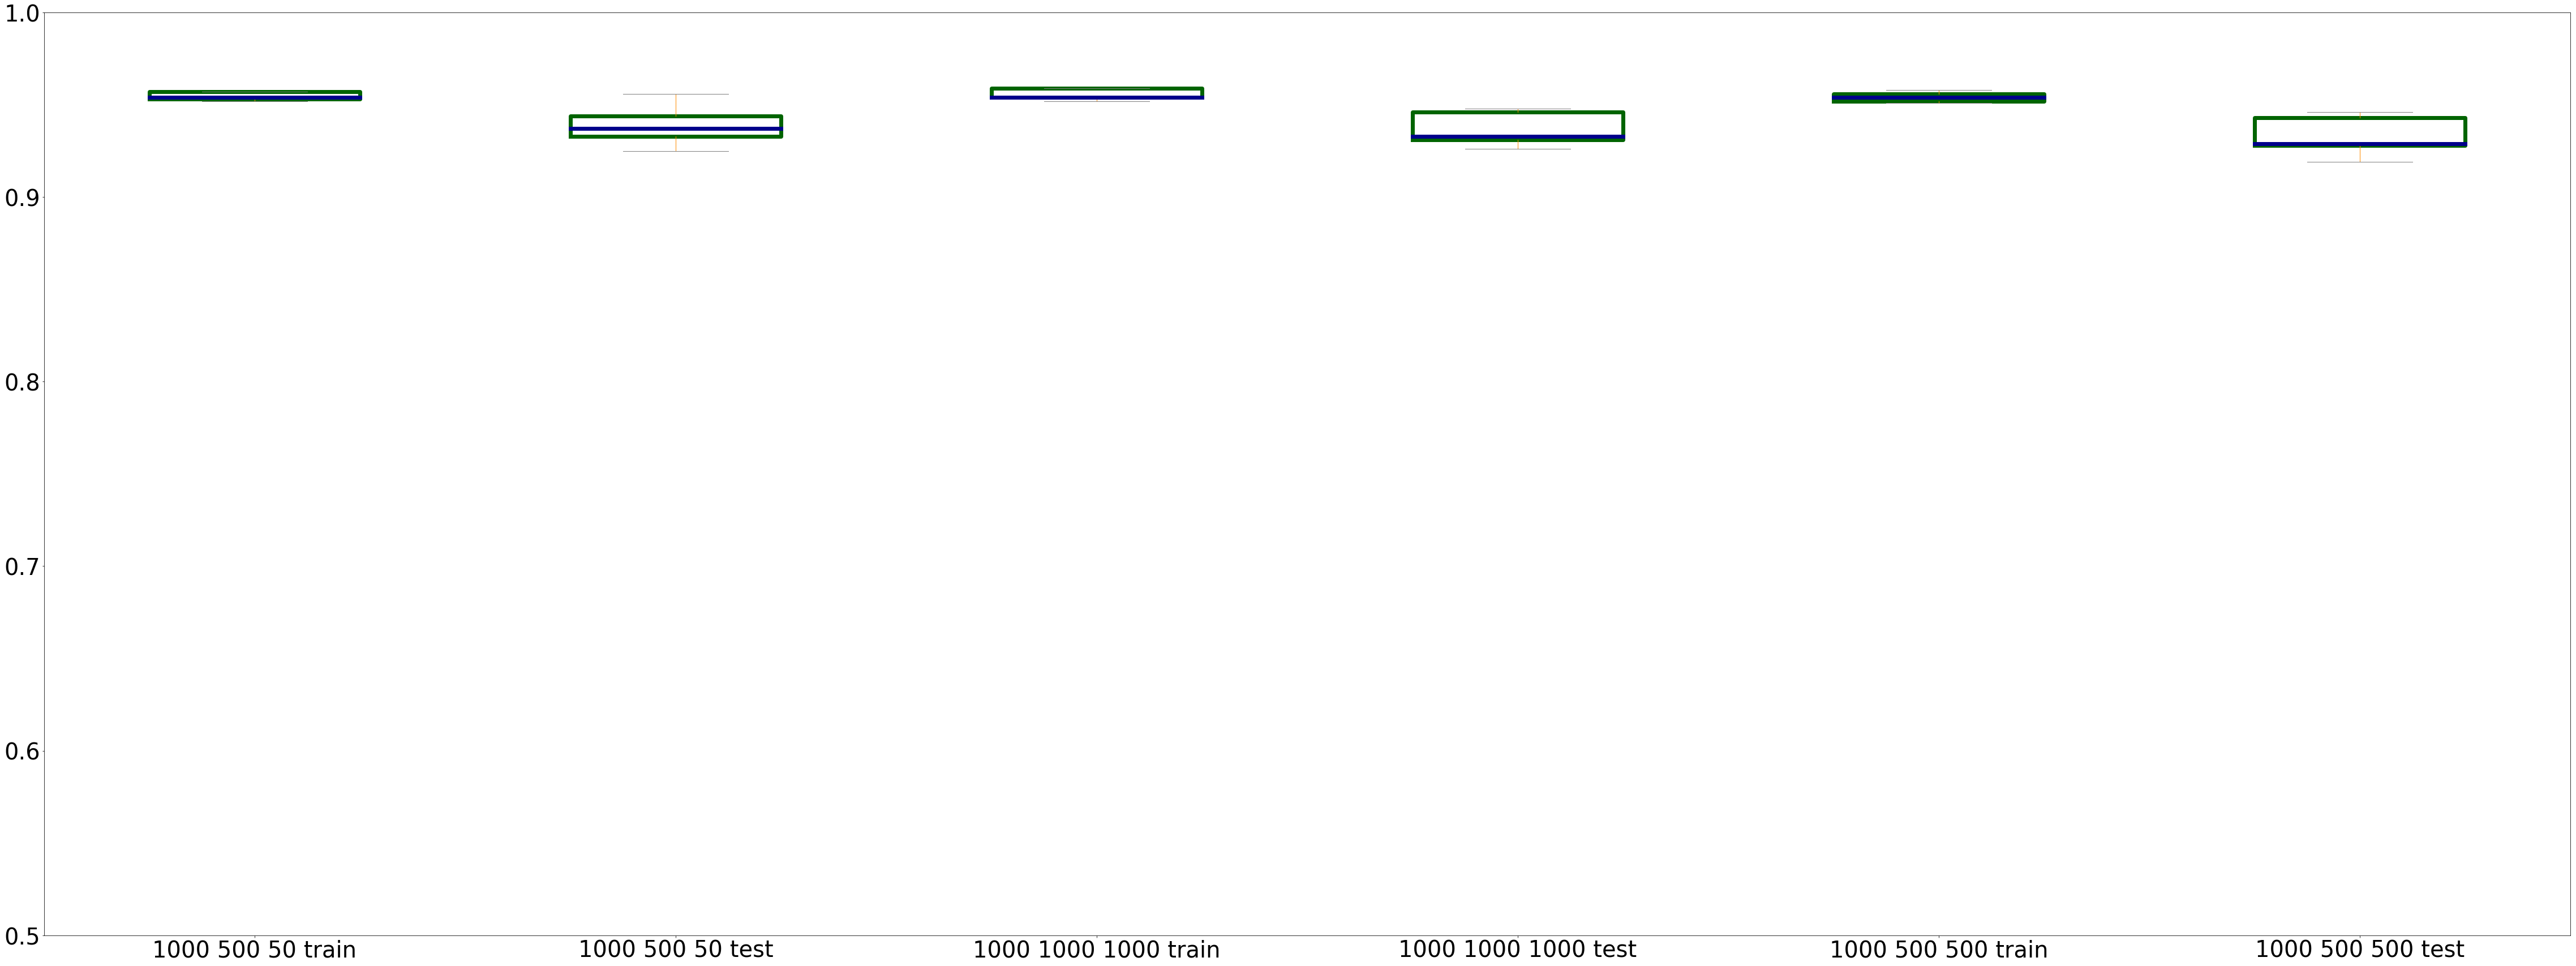

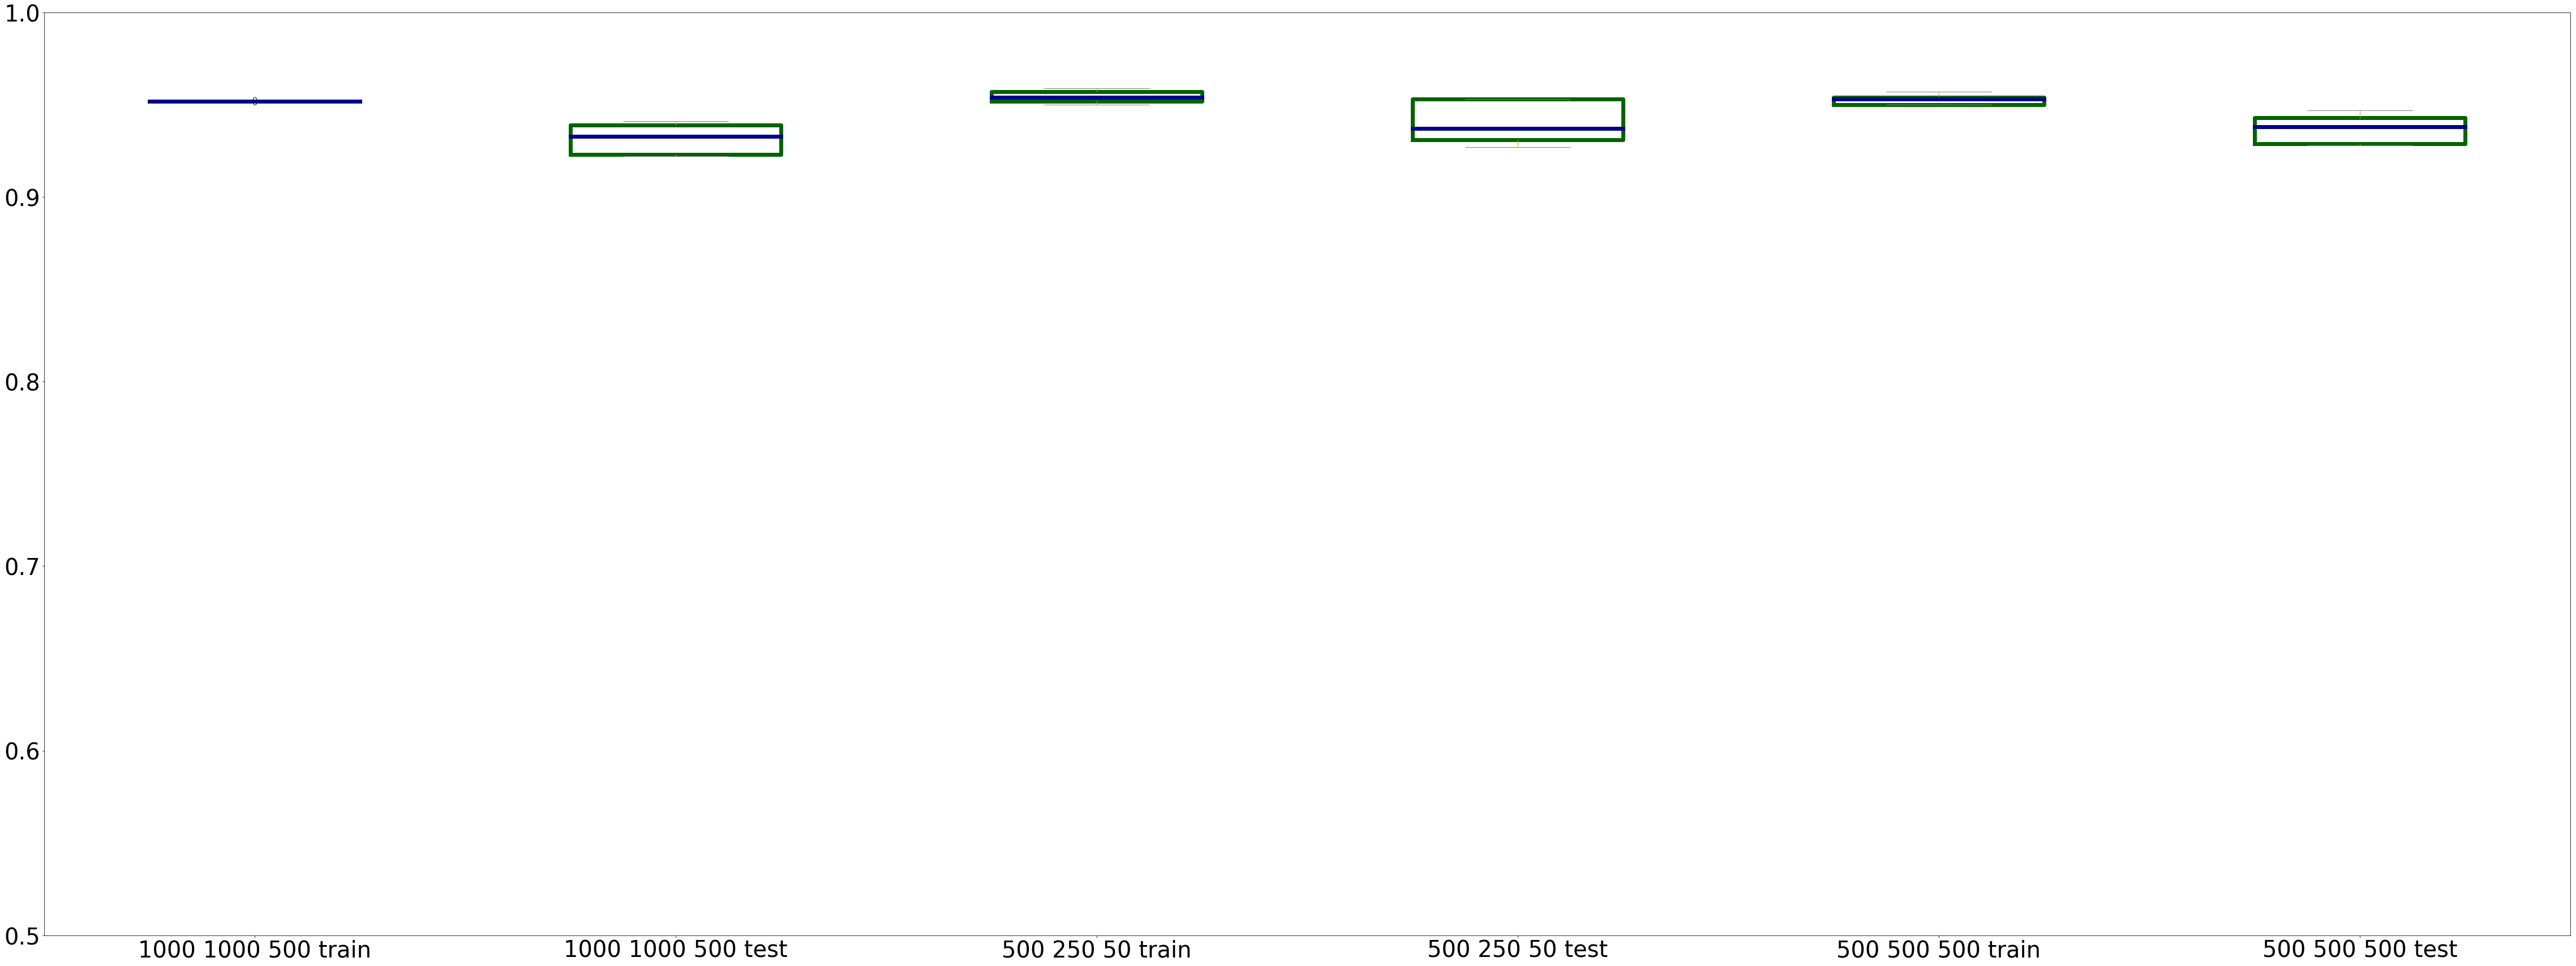

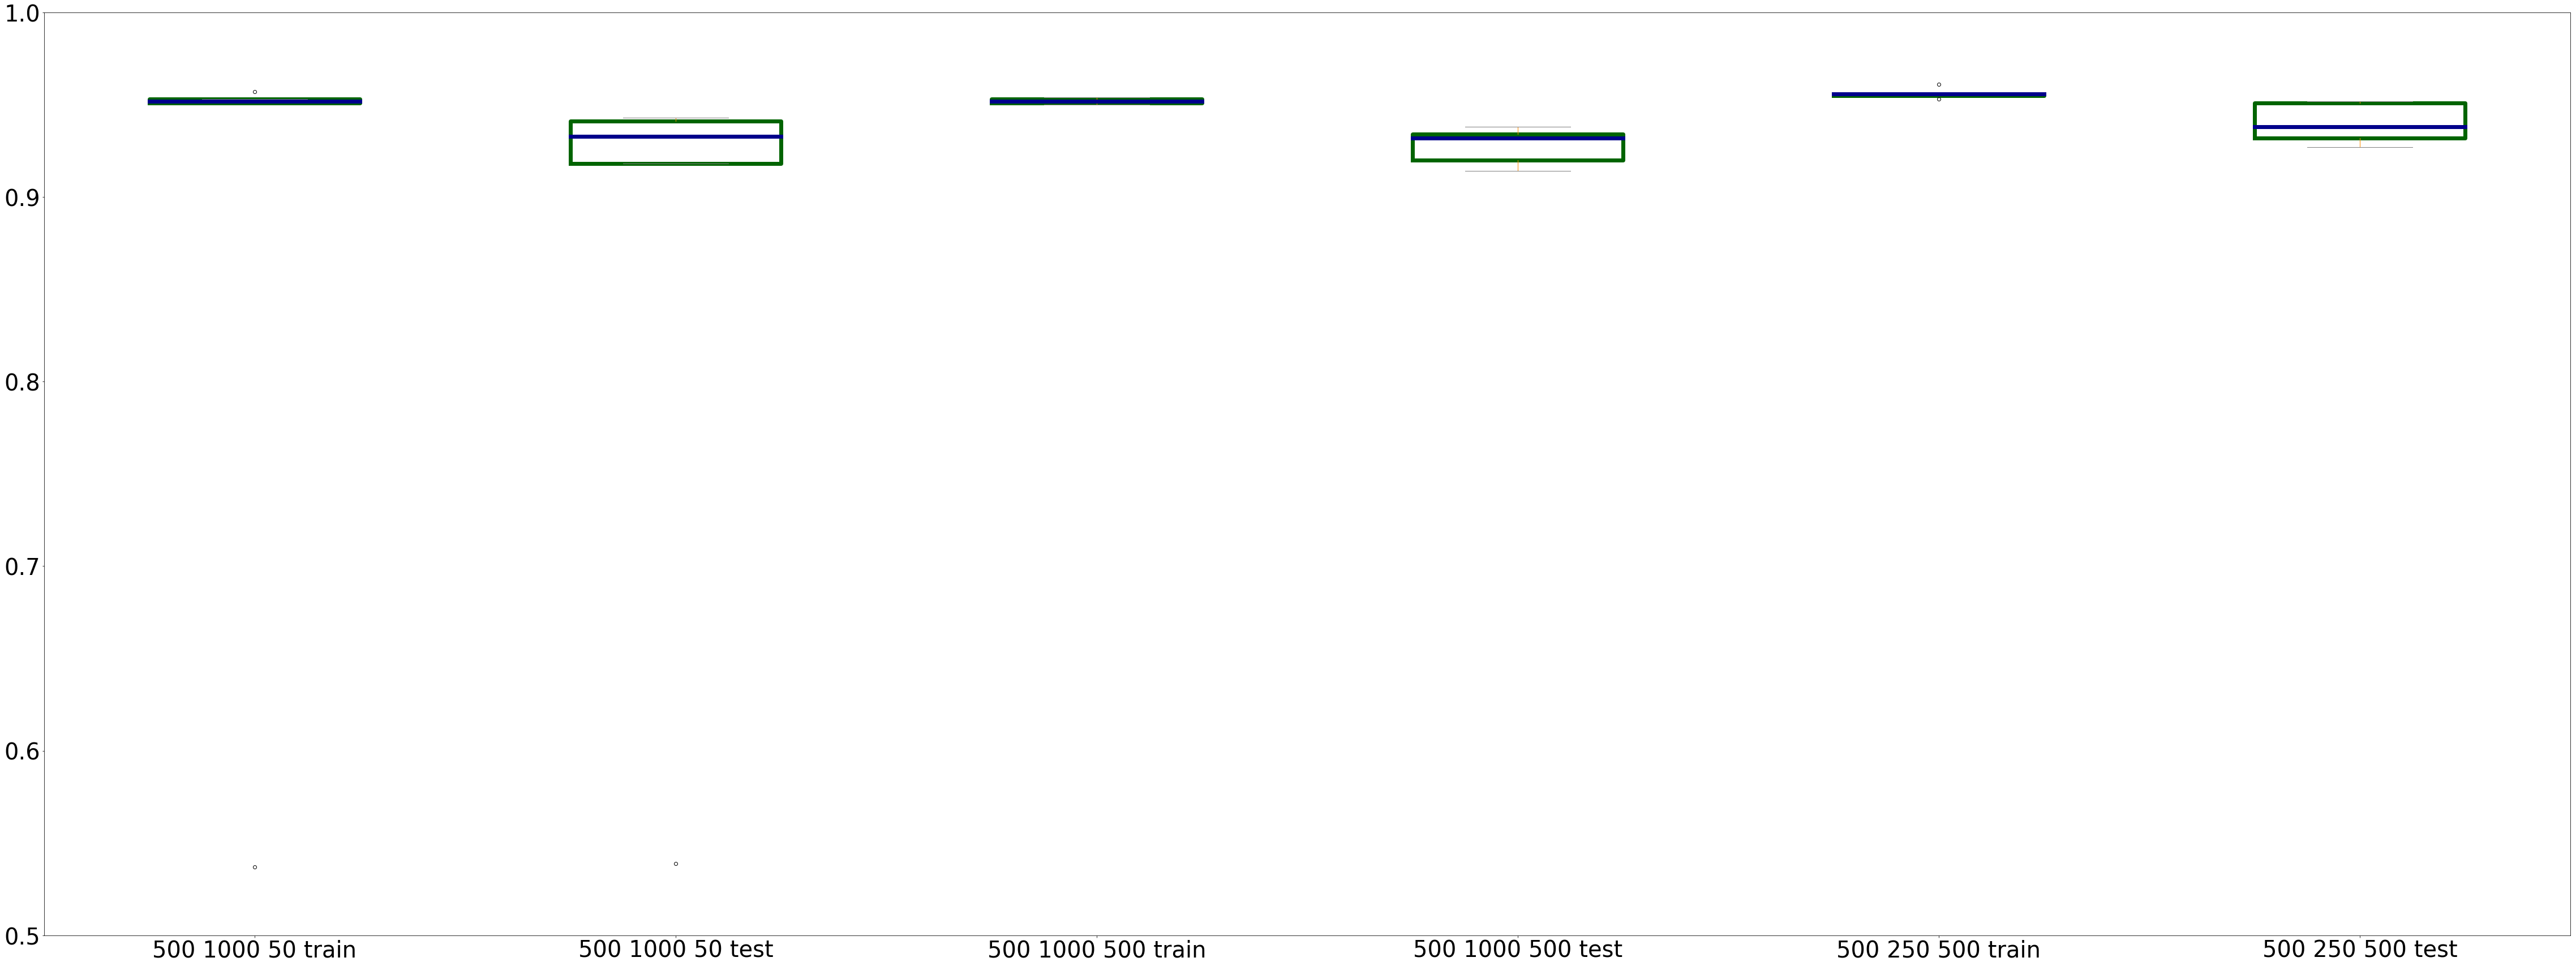

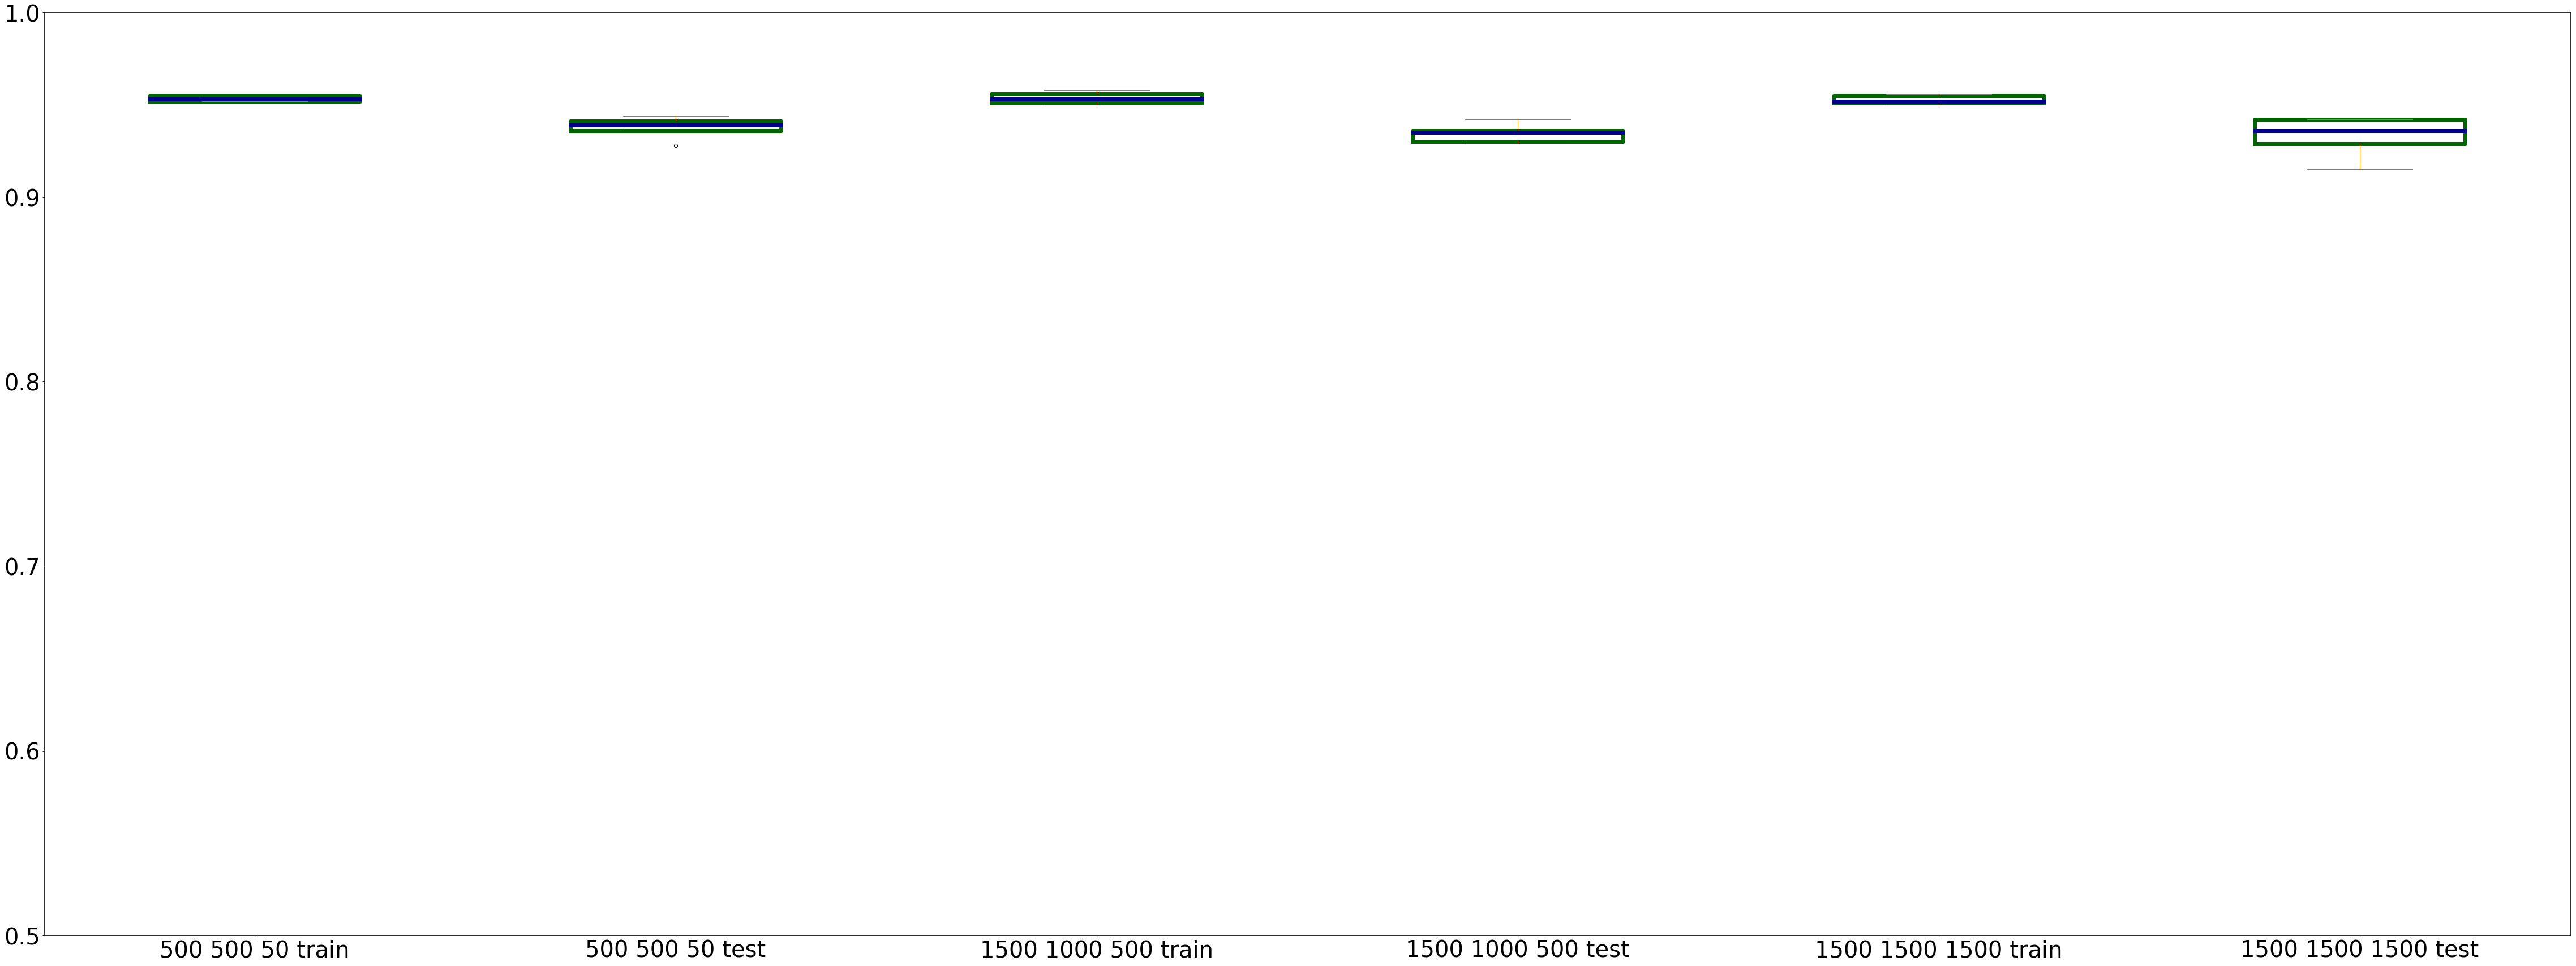

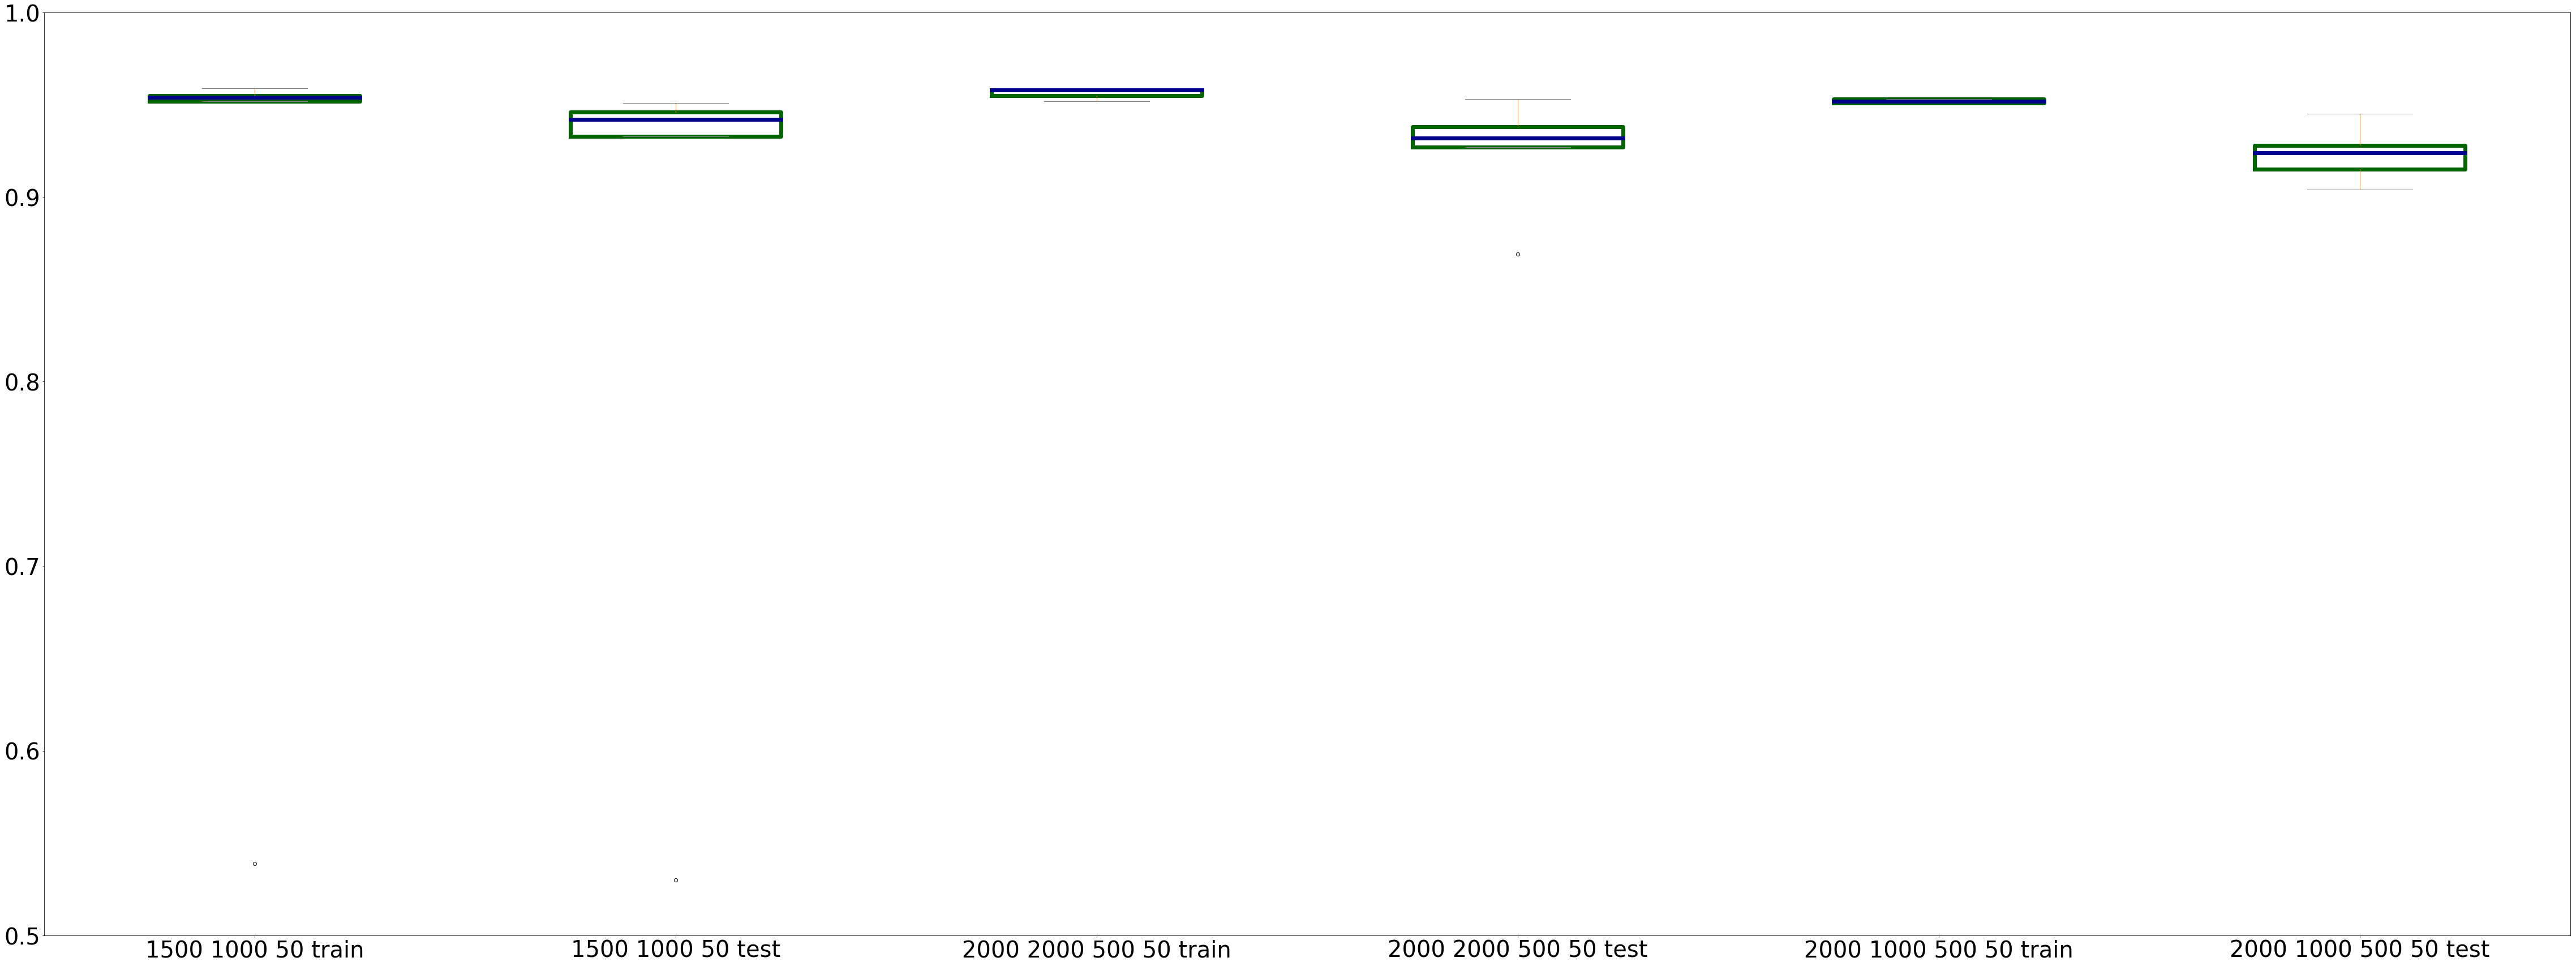

In [71]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
boxprops = dict(linestyle='-', linewidth=7, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=7, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
fs = 40
concated = pd.concat([train_accuracies.loc[:,labels[0]+" train"].to_frame(),test_accuracies.loc[:,labels[0]+" test"].to_frame()], axis=1)
###Data Read
input_file = "/Users/taewan/Desktop/Ahn/Git/BioDataLab/Data/output/relu_test_ps7_result.csv"
plottingdata = pd.read_csv(input_file)
labels = plottingdata['node']
labels = labels.as_matrix()

###Data processing
accuracies = plottingdata.iloc[:, 6:]
accuracies = accuracies.transpose()
train_accuracies = accuracies.iloc[:5,:]
train_accuracies.index = ["fold-1", "fold-2", "fold-3", "fold-4", "fold-5"]
train_accuracies.columns = labels+" train"
test_accuracies = accuracies.iloc[5:,:]
test_accuracies.index = ["fold-1", "fold-2", "fold-3", "fold-4", "fold-5"]
test_accuracies.columns = labels+" test"

concated = pd.concat([train_accuracies.loc[:,labels[0]+" train"].to_frame(),test_accuracies.loc[:,labels[0]+" test"].to_frame()], axis=1)

for i in range(1, len(test_accuracies.iloc[1])):
    concated = pd.concat([concated ,train_accuracies.loc[:,labels[i]+" train"].to_frame()] , axis=1)
    concated = pd.concat([concated ,test_accuracies.loc[:,labels[i]+" test"].to_frame() ], axis=1) 
    
# ###Plotting
plt.figure(1)
ax1 = concated.iloc[:,0:6].plot.box(return_type='axes', figsize=(80,30), flierprops = flierprops,
                           fontsize=fs, color=color,boxprops=boxprops, medianprops = medianprops)
ax1.set_ylim(0.5,1.0)
plt.figure(2)
ax2 = concated.iloc[:,6:12].plot.box(return_type='axes', figsize=(80,30), fontsize=fs,color=color ,boxprops=boxprops, medianprops = medianprops)
ax2.set_ylim(0.5,1.0)
plt.figure(3)
ax3 =concated.iloc[:,12:18].plot.box(return_type='axes', figsize=(80,30), fontsize=fs,color=color,boxprops=boxprops, medianprops = medianprops)
ax3.set_ylim(0.5,1.0)

plt.figure(4)
ax4=concated.iloc[:,18:24].plot.box(return_type='axes', figsize=(80,30), fontsize=fs,color=color,boxprops=boxprops, medianprops = medianprops)
ax4.set_ylim(0.5,1.0)

plt.figure(5)
ax5=concated.iloc[:,24:30].plot.box(return_type='axes', figsize=(80,30), fontsize=fs,color=color,boxprops=boxprops, medianprops = medianprops)
ax5.set_ylim(0.5,1.0)

# plt.figure(2)
# test_accuracies.plot.box(return_type='axes', figsize=(80,30), fontsize=20)
plt.show()